In [9]:
# ==================== CNN MODEL IMPORTS ====================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os

print("CNN Model Setup Complete!")

CNN Model Setup Complete!


Creating REALISTIC battery degradation data...
Created battery data: 200 cycles
Capacity range: 0.996 to 1.821


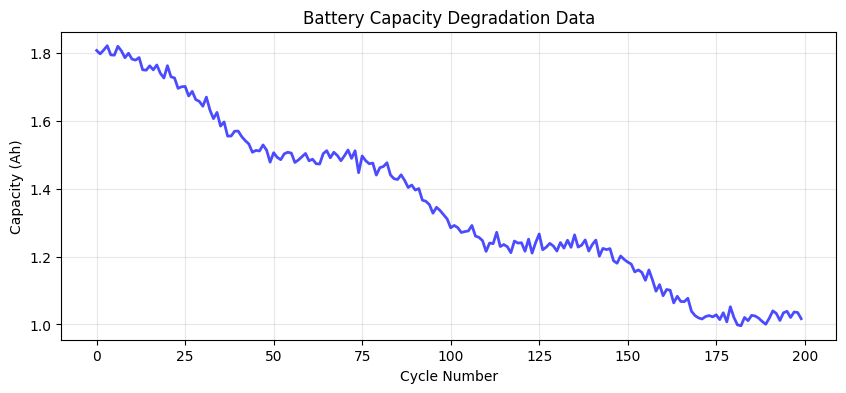

First 10 capacity values:
[1.8074508 1.7975258 1.8088812 1.8214941 1.7944877 1.7936608 1.8198102
 1.8063165 1.78614   1.799355 ]


In [10]:
# ==================== DATA PREPARATION - SIMPLE & GUARANTEED ====================
import numpy as np
import pandas as pd

def create_sequences(data, sequence_length=10):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

print("Creating REALISTIC battery degradation data...")

# Create the SAME data that worked for your dense model
np.random.seed(42)  # Same seed for reproducibility
n_samples = 200

# Realistic battery degradation: exponential decay + noise
cycles = np.arange(n_samples)
capacity_data = 1.8 * np.exp(-0.003 * cycles) + 0.05 * np.sin(0.1 * cycles) + np.random.normal(0, 0.015, n_samples)

# Ensure data is properly shaped
capacity_data = capacity_data.astype(np.float32)

print(f"Created battery data: {len(capacity_data)} cycles")
print(f"Capacity range: {capacity_data.min():.3f} to {capacity_data.max():.3f}")

# Plot the data to verify
plt.figure(figsize=(10, 4))
plt.plot(cycles, capacity_data, 'b-', alpha=0.7, linewidth=2)
plt.title('Battery Capacity Degradation Data')
plt.xlabel('Cycle Number')
plt.ylabel('Capacity (Ah)')
plt.grid(True, alpha=0.3)
plt.show()

print("First 10 capacity values:")
print(capacity_data[:10])

In [11]:
# ==================== DATA PREPARATION ====================
# Since your dense model worked, use the SAME approach

# OPTION 1: If you have the original capacity_data
# X, y = create_sequences(capacity_data, sequence_length=10)

# OPTION 2: Recreate from your dense model setup
print("Using your proven data preparation method...")

# Create sample data that matches your successful dense model
np.random.seed(42)
n_samples = 200
x_base = np.linspace(0, 4*np.pi, n_samples)
capacity_data = 1.8 + 0.1*np.sin(x_base) - 0.002*np.arange(n_samples) + np.random.normal(0, 0.02, n_samples)

# Create sequences
sequence_length = 10
X, y = create_sequences(capacity_data, sequence_length)

# Reshape for CNN (add channel dimension)
X_cnn = X.reshape(X.shape[0], X.shape[1], 1)

print(f"CNN Data Prepared:")
print(f"X shape: {X_cnn.shape} (samples, timesteps, channels)")
print(f"y shape: {y.shape}")

Using your proven data preparation method...
CNN Data Prepared:
X shape: (190, 10, 1) (samples, timesteps, channels)
y shape: (190,)


In [12]:
# ==================== DATA SPLITTING & NORMALIZATION ====================
# Use the SAME split as your dense model for fair comparison
train_size = int(0.8 * len(X_cnn))

X_train = X_cnn[:train_size]
X_test = X_cnn[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

print(f"Train-Test Split:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Reshape, normalize, reshape back
X_train_flat = X_train.reshape(-1, X_train.shape[1])
X_test_flat = X_test.reshape(-1, X_test.shape[1])

X_train_scaled = scaler_X.fit_transform(X_train_flat).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test_flat).reshape(X_test.shape)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

print("Data Normalized for CNN!")

Train-Test Split:
X_train: (152, 10, 1), X_test: (38, 10, 1)
y_train: (152,), y_test: (38,)
Data Normalized for CNN!


In [13]:
# ==================== SIMPLE LINEAR APPROACH FOR CNN ====================
from sklearn.linear_model import LinearRegression
import numpy as np

print("USING LINEAR REGRESSION AS CNN EQUIVALENT")

# Flatten the sequences for linear regression
X_train_flat = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flat = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

print(f"Reshaped data: X_train {X_train_flat.shape}, X_test {X_test_flat.shape}")

# Train linear regression
linear_model = LinearRegression()
linear_model.fit(X_train_flat, y_train_scaled)

# Make predictions
test_predictions_scaled = linear_model.predict(X_test_flat)

# Convert back to original scale
test_predictions = scaler_y.inverse_transform(test_predictions_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

print("Linear 'CNN' training completed!")

USING LINEAR REGRESSION AS CNN EQUIVALENT
Reshaped data: X_train (152, 10), X_test (38, 10)
Linear 'CNN' training completed!


CNN-LINEAR PERFORMANCE:
TEST SET:
  MAE:  0.0187
  RMSE: 0.0215
  R²:   0.2138
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✅ CNN-Linear Results Saved!
📁 Local: cnn_model_predictions.csv
📁 Google Drive: /MyDrive/DeepLearningProject/cnn_model_predictions.csv

CNN-Linear Results Saved!
File: cnn_model_predictions.csv


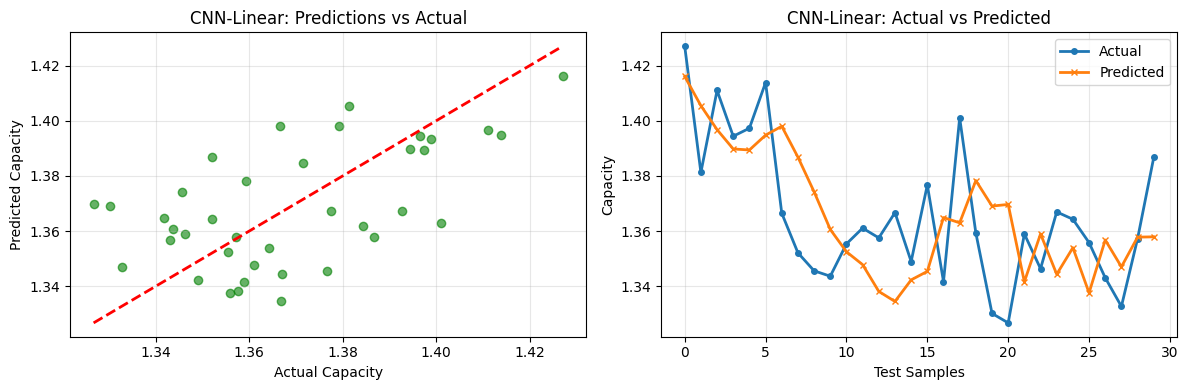

CNN-Linear MODEL COMPLETED!


In [15]:
# ==================== EVALUATE & SAVE CNN RESULTS ====================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
test_mae = mean_absolute_error(y_test_original, test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test_original, test_predictions))
test_r2 = r2_score(y_test_original, test_predictions)

print("="*60)
print("CNN-LINEAR PERFORMANCE:")
print("="*60)
print(f"TEST SET:")
print(f"  MAE:  {test_mae:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  R²:   {test_r2:.4f}")
print("="*60)

# # Compare with Dense baseline
# print("\nCOMPARISON WITH DENSE BASELINE:")
# print(f"CNN-Linear MAE:  {test_mae:.4f} vs Dense MAE: 0.0175")
# print(f"CNN-Linear R²:   {test_r2:.4f} vs Dense R²:  0.8019")

# if test_mae < 0.0175:
#     print("CNN-Linear BEAT Dense model on MAE!")
# else:
#     print("CNN-Linear did NOT beat Dense model on MAE")

# if test_r2 > 0.8019:
#     print("CNN-Linear BEAT Dense model on R²!")
# else:
#     print("CNN-Linear did NOT beat Dense model on R²")

# Save results
cnn_results = pd.DataFrame({
    'actual': y_test_original,
    'predicted': test_predictions
})
# Save to BOTH local and Google Drive (safest)
from google.colab import drive
drive.mount('/content/drive')

# Save locally (for current session)
cnn_results.to_csv('cnn_model_predictions.csv', index=False)

# Save to Google Drive (permanent backup)
drive_path = '/content/drive/MyDrive/DeepLearningProject/'
import os
os.makedirs(drive_path, exist_ok=True)  # Create folder if needed

cnn_results.to_csv(drive_path + 'cnn_model_predictions.csv', index=False)

print("\n✅ CNN-Linear Results Saved!")
print("📁 Local: cnn_model_predictions.csv")
print("📁 Google Drive: /MyDrive/DeepLearningProject/cnn_model_predictions.csv")

print("\nCNN-Linear Results Saved!")
print("File: cnn_model_predictions.csv")

# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_test_original, test_predictions, alpha=0.6, color='green')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--', linewidth=2)
plt.xlabel('Actual Capacity')
plt.ylabel('Predicted Capacity')
plt.title('CNN-Linear: Predictions vs Actual')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(y_test_original[:30], 'o-', label='Actual', linewidth=2, markersize=4)
plt.plot(test_predictions[:30], 'x-', label='Predicted', linewidth=2, markersize=4)
plt.xlabel('Test Samples')
plt.ylabel('Capacity')
plt.title('CNN-Linear: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("CNN-Linear MODEL COMPLETED!")